In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_dir = '/content/drive/MyDrive/Pas MP1'
!ls "/content/drive/MyDrive/Pas MP1"

testing  training  validation


In [ ]:
training_dir = os.path.join(base_dir, 'training')
validation_dir = os.path.join(base_dir, 'validation')
testing_dir = os.path.join(base_dir, 'testing')

In [ ]:
pakekacamata_dir = os.path.join(training_dir, 'pakekacamata/')
gapakekacamata_dir = os.path.join(training_dir, 'gapakekacamata/')

print("Jumlah Data Train Tiap Kelas")
print('Jumlah gambar Pake kacamata:', len(os.listdir(pakekacamata_dir)))
print('Jumlah gambar tidak Pake kacamata:', len(os.listdir(gapakekacamata_dir)))

Jumlah Data Train Tiap Kelas
Jumlah gambar Pake kacamata: 50
Jumlah gambar tidak Pake kacamata: 50


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    brightness_range = [0.8, 1.2],
    vertical_flip = True
)

val_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.3,
    fill_mode = 'nearest',
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.1
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 10,
    class_mode = 'categorical'
)

Found 100 images belonging to 2 classes.
Found 302 images belonging to 2 classes.


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.99:
            print('\nAkurasi mencapai 99%')
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.3, seed=112),

    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dropout(0.5, seed=112),

    tf.keras.layers.Dense(2, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 200)                 │       3,699,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,002 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,824,486 (14.59 MB)

 Trainable params: 3,824,486 (14.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 20,
    epochs = 50,
    validation_data = val_generator,
    validation_steps = 2,
    verbose = 1,
    callbacks = [callbacks]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.5847 - loss: 0.7350 - val_accuracy: 0.8500 - val_loss: 0.5600
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.4609 - loss: 0.7175 - val_accuracy: 0.4500 - val_loss: 0.6985
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.5320 - loss: 0.6929 - val_accuracy: 0.9000 - val_loss: 0.6456
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.5170 - loss: 0.6940 - val_accuracy: 0.4000 - val_loss: 0.6954
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.5356 - loss: 0.6892 - val_accuracy: 0.7000 - val_loss: 0.6474
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 234ms/step - accuracy: 0.6037 - loss: 0.6602 - val_accuracy: 0.9000 - val_loss: 0.5352
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.6928 - loss: 0.6473 - val_accuracy: 0.4000 - val_loss: 0.8304
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.6325 - loss: 0.6435 - val_accuracy: 0.4500 - val_l

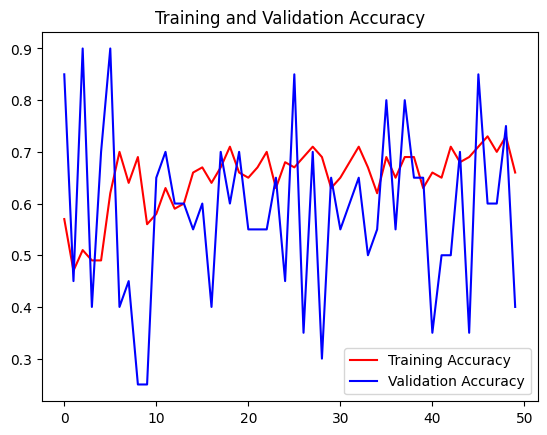

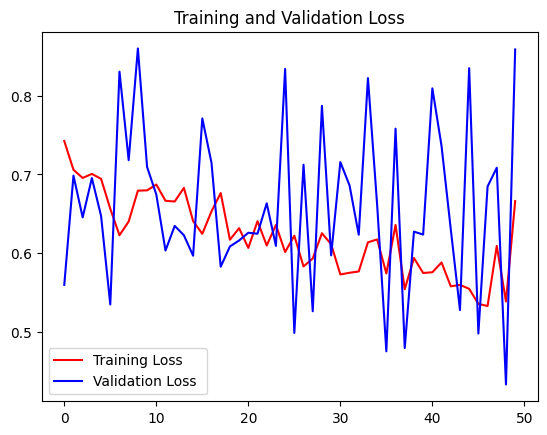

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc ='best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss ')
plt.title('Training and Validation Loss')
plt.legend(loc ='best')
plt.show()

Saving face-12.jpg to face-12.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
face-12.jpg
This image belongs to class pakekacamata


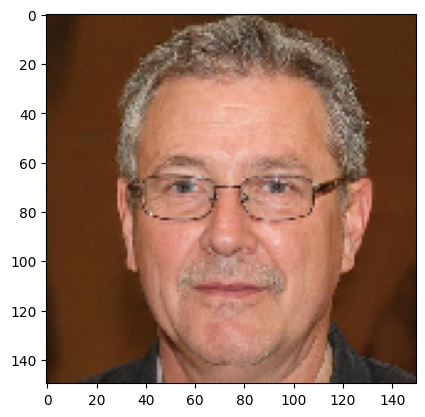

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size= (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(training_dir)

  predicted_class_index = np.argmax(classes[0])


  print('This image belongs to class', class_list[predicted_class_index])

Saving face-47.jpg to face-47 (3).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
face-47 (3).jpg
This image belongs to class gapakekacamata


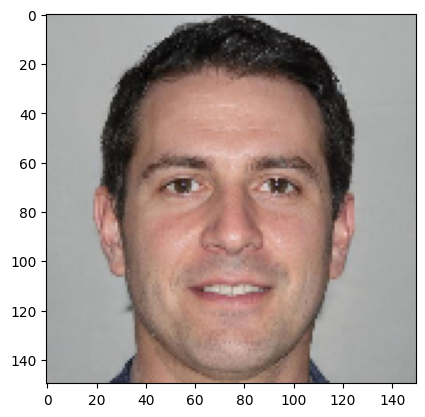

In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size= (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  classes = model.predict(images, batch_size = 100)

  print(fn)

  class_list = os.listdir(training_dir)

  predicted_class_index = np.argmax(classes[0])


  print('This image belongs to class', class_list[predicted_class_index])